# Data Cleaning

Author: Salma/Jeff/Haoming
    
Description: 
    
    In this file, I first analyzed the raw data and find some typos, outliers.
    
    Second, I delete and modify some data that are not corret
    
    Third, I translate the strings types into digit

In [57]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Raw data analysis

`data["Column"].values_counts()` returns objects in descending order so that the first element is the most frequently-occurring element. 

In [5]:
data["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [6]:
data["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [8]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
data["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [10]:
data["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [11]:
data["smoking_status"].value_counts()  

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

The original DataSet has missing values, and the missing data must be deleted or replaced before drawing, otherwise the drawing cannot be successful.

In [12]:
def visualize_data(df,column_name,x_label,y_label,title,save_name,bins):
    newdf=df.dropna(subset=[column_name])
    #Configuring the font family
    plt.rcParams["font.sans-serif"]='SimHei'
    plt.rcParams['axes.unicode_minus']=False

    plt.hist(x=df[column_name],bins=bins,
            color="steelblue",
            edgecolor="black")

    # Adding x-axis and y-axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add title
    plt.title(title)

    # Display graphic
    plt.savefig(save_name,dpi=300)
    plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


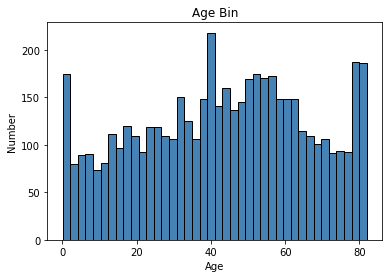

In [13]:
visualize_data(data,"age",x_label="Age",y_label="Number",title="Age Bin",save_name="Age Bin.png",bins=40)

`data["Column"].describe()` computes and displays summary statistics

In [14]:
data["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

From the summary statistics, it seems like the  youngest child is only 0.08.

##### Would this child get a stroke??

In [15]:
data[(data['age']<=10) & (data['stroke']==1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1


The youngest child who's less than 10 years old and who had a stroke is 1.32

#### Average Glucose Level Bin

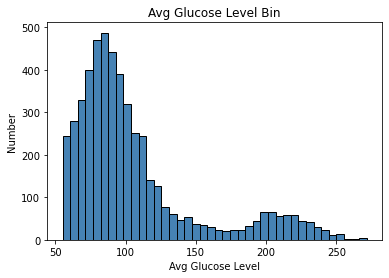

In [16]:
visualize_data(data,"avg_glucose_level",x_label="Avg Glucose Level",y_label="Number",
               title="Avg Glucose Level Bin",save_name="Avg Glucose Level.png",bins=40)

In [17]:
data["avg_glucose_level"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

#### BMI Bin

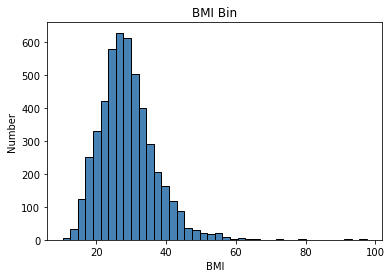

In [18]:
visualize_data(data,"bmi",x_label="BMI",y_label="Number",title="BMI Bin",save_name="BMI.png",bins=40)

In [19]:
data["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

From this Bin, we can say that any BMI value larger than 60 could be thought as outliers.

Assumptions made after visualizations' analysis take us to the next step:

## Filtering out all the impossible data

### 1. Age

we suppose any age below 10 would be the noise to the final data

In [20]:
data=data.drop(data[data['age']<10].index)

### 2. BMI

From previous analysis, we assumed that any BMI > 60 could be the outliers

In [21]:
data=data.drop(data[data['bmi']>60].index)

BMI columns also contains NaN values. And since we do not know the weight and height, we cloud drop the BMI that we do not know

In [22]:
#first, drop all the nan value in bmi
data=data.dropna(how='any')
# second method, fillin the nan with previous data
#data=data.fillna(method='ffill', , axis=0)#用前面的值来填充
#third method, fillin the nan with back data
#data=data.fillna(method='backfill', axis=0)
#forth fillna with mean
# mean_val = data["bmi"].mean()
# data["bmi"]=data["bmi"].fillna(mean_val)

In [23]:
data["bmi"].describe()

count    4437.000000
mean       29.811134
std         7.103848
min        11.300000
25%        24.800000
50%        28.700000
75%        33.700000
max        59.700000
Name: bmi, dtype: float64

In [24]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### if we do not want to digitalize the string, we save the 'clean_data_string.csv'

In [25]:
data.to_csv('clean_data_string.csv',index=None)

## Translating all the string information into digit

### 1. Ever_married

Yes: 1

No: 0

In [26]:
marriage_mapping = {'Yes': 1,
                    'No': 0}
data["ever_married"]=data["ever_married"].map(marriage_mapping)

### 2. Gender

male: 1

female: 0

In [27]:
# Since we think gender might be the factor that influence the result. we drop the other
data=data.drop(data[data['gender']=='Other'].index)

In [28]:
gender_mapping = {'Male': 1,
                  'Female': 0}
  
data["gender"]=data["gender"].map(gender_mapping)

### 3. smoking status

'formerly smoked': 2, 

'smokes': 1,

'never smoked':0,

'Unknown': 3

In [29]:
smoking_status_mapping = {'formerly smoked': 2,
                          'smokes': 1,
                          'never smoked':0,
                          'Unknown': 3
                         }
data["smoking_status"]=data["smoking_status"].map(smoking_status_mapping)

For the unknown status, it is really confusing and might influence our result. So, before we put all the data into our algorithms. 

A **pre analysis** is needed.

For those who never smoked, only 83 of them are stroke

In [30]:
data[data["smoking_status"]==0]["stroke"].value_counts()

0    1763
1      84
Name: stroke, dtype: int64

We see that some people did not fill in the `smoking_status(Unknown)`.  

From here, we know that among all the people with smoking `status == Unknown`, only 29 of them have stroke

In [31]:
data[data["smoking_status"]==3]["stroke"].value_counts()

0    991
1     29
Name: stroke, dtype: int64

### 4.work_type

Private          2925

Self-employed     819

children          687

Govt_job          657

Never_worked       22

In [32]:
data[(data['age']<=18)]["work_type"].value_counts()

children         214
Private          178
Never_worked      20
Self-employed     14
Govt_job           9
Name: work_type, dtype: int64

In [33]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,2,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,1,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,Private,Urban,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,children,Rural,103.08,18.6,3,0
5106,44873,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,0,0
5107,19723,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,0,0
5108,37544,1,51.0,0,0,1,Private,Rural,166.29,25.6,2,0


For teenagers under age of 18, we think there is a typo. Instead, we assign children as a `work_type`

In [34]:
data.loc[(data['age']<=18),"work_type"]="children"

In [35]:
data[(data['age']<=18)]["work_type"].value_counts()

children    435
Name: work_type, dtype: int64

In [36]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,2,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,1,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,Private,Urban,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,children,Rural,103.08,18.6,3,0
5106,44873,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,0,0
5107,19723,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,0,0
5108,37544,1,51.0,0,0,1,Private,Rural,166.29,25.6,2,0


In [37]:
work_type_mapping = {"Private": 0,
                  "Self-employed": 1,
                    "children":2,
                     "Govt_job":3,
                     "Never_worked":4
                    }
  
data["work_type"]=data["work_type"].map(work_type_mapping)

In [38]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,Urban,228.69,36.6,2,1
2,31112,1,80.0,0,1,1,0,Rural,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,0,Urban,171.23,34.4,1,1
4,1665,0,79.0,1,0,1,1,Rural,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,0,Urban,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,2,Rural,103.08,18.6,3,0
5106,44873,0,81.0,0,0,1,1,Urban,125.20,40.0,0,0
5107,19723,0,35.0,0,0,1,1,Rural,82.99,30.6,0,0
5108,37544,1,51.0,0,0,1,0,Rural,166.29,25.6,2,0


### 5. Residence_type

Urban 1

Rural 0

In [39]:
Residence_type_mapping = {'Urban': 1,
                  'Rural': 0}
  
data["Residence_type"]=data["Residence_type"].map(Residence_type_mapping)

## Now, let's look at the Data after all the Data cleaning 

In [40]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.6,2,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.4,1,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,0,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,2,0,103.08,18.6,3,0
5106,44873,0,81.0,0,0,1,1,1,125.20,40.0,0,0
5107,19723,0,35.0,0,0,1,1,0,82.99,30.6,0,0
5108,37544,1,51.0,0,0,1,0,0,166.29,25.6,2,0


We don't necessarily want "ID" to be one part of the input. Therefore, Let's drop this column 

In [41]:
del data["id"]

In [42]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,0,49.0,0,0,1,0,1,171.23,34.4,1,1
4,0,79.0,1,0,1,1,0,174.12,24.0,0,1
5,1,81.0,0,0,1,0,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,2,0,103.08,18.6,3,0
5106,0,81.0,0,0,1,1,1,125.20,40.0,0,0
5107,0,35.0,0,0,1,1,0,82.99,30.6,0,0
5108,1,51.0,0,0,1,0,0,166.29,25.6,2,0


We still have NAN values. 

Now if we think "NAN" is also a real stage, we get the "clean_data_NAN.csv"

In [43]:
data.to_csv('clean_data_NAN.csv',index=None)

If we only keep the original data and do not think of "NAN" as a real stage of smoking status

In [44]:
new_data=data.drop(data[data['smoking_status']==4].index)
new_data.to_csv('clean_data.csv',index=None)

In [45]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [46]:
for i in data.columns:
    print(i+' '+str(data[i].nunique()))

gender 2
age 73
hypertension 2
heart_disease 2
ever_married 2
work_type 5
Residence_type 2
avg_glucose_level 3588
bmi 386
smoking_status 4
stroke 2


## Visualizations

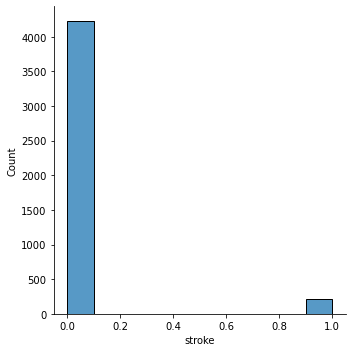

In [47]:
sns.displot(data=data, x="stroke", bins =10)

Histogram representing the number of individuals who either had or never had a stroke in our dataset. 

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

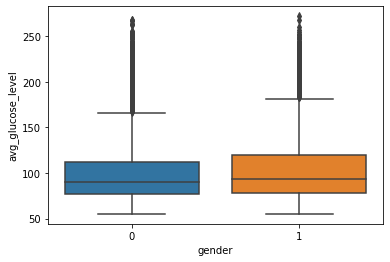

In [48]:
sns.boxplot(data=data, x="gender", y="avg_glucose_level")

This boxplot gives accurate detailed visualization of the data. For example, we see that both the minimum and maximum `avg_glucose_level` for male and female individuals are nearlt the same. However, the third quartile Q3 for `avg_glucose_level` is bigger for male than for female individuals. Moreover, the `avg_glucose_level` median is slightly larger for male individuals.

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

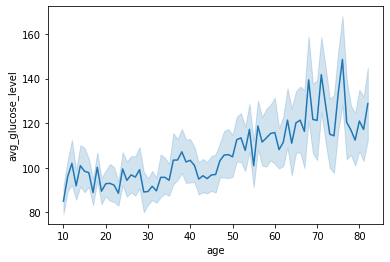

In [49]:
sns.lineplot(data=data, x="age", y="avg_glucose_level")

This plot choice is very reasonable bacause `avg_glucose_level` and `age` are correlated variables. They are related in the sense that the average glucose level increases as individuals grow older. This is very relevant since high glucose levels increase the chance of stroke.

<AxesSubplot:xlabel='age', ylabel='bmi'>

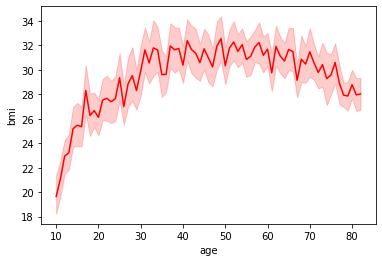

In [51]:
sns.lineplot(data=data, x="age", y="bmi", color = "red")

This plot choice is also very reasonable bacause `bmi` and `age` are correlated variables. They are related in the sense that the BMI has an overall increasing tendency as individuals grow older. This is very relevant since each unit increase in body mass index (BMI) increases the risk of stroke by 5 percent.

## Statistical Inference 

1. First, we compute a 95% confidence interval for the mean age of individuals using normal distribution. 

In [52]:
mu_1 = np.mean(data["age"])
sigma_1 = np.std(data["age"])
n_1 = len(data["age"])
CI_1 = stats.norm.interval(alpha = 0.95, loc = mu_1, scale = sigma_1 / np.sqrt(n_1))
print(CI_1)

(46.28024882662558, 47.44472863054304)


    then we compute a 95% confidence interval for the mean age of individuals who had a a stroke `stroke=1` using the normal distribution. 

In [53]:
df = data[data["stroke"] == 1]
mu_2 = np.mean(df["age"])
sigma_2 = np.std(df["age"])
n_2 = len(df["age"])
CI_2 = stats.norm.interval(alpha = 0.95, loc = mu_2, scale = sigma_2 / np.sqrt(n_2))
print(CI_2)

(66.03544809074955, 69.39038922982462)


Since the confidence intervals do **not overlap** we can determine that the difference between the two means is statistically significant.



From the computed confidence intervals, it can be said that there is no significant evidence for one might to suspect that having a stroke has been rated 


by older individuals. This is because the confidence intervals of the mean age of individuals and the mean age of individuals who have had a stroke are both very close to each other. In other words, the mean age of users who have rated the movie is not significantly different from the mean age of users.


2. We now conduct a hypothesis test on two non overlapping subsets from our dataset. We wanted to test whether or not the average number of strokes cases is the same for female individuals who smoke and male individuals who smoke . 

    H0: The average number of strokes cases **is the same** for female individuals who smoke and male individuals who smoke 


    H1:  The average number of strokes cases **is not the same** for female individuals who smoke and male individuals who smoke 


In [54]:
#data[data["stroke"] == 1]

df_smokingStatus_mask = data["smoking_status"]== 1 

df_female_mask = data['gender'] == 0
df_female = data[df_female_mask & df_smokingStatus_mask]

df_male_mask = data['gender'] == 1
df_male = data[df_male_mask & df_smokingStatus_mask]

p_val = stats.ttest_ind(np.array(df_female["stroke"]), np.array(df_male["stroke"]))[1]
print('p-value:', p_val)

p-value: 0.1434828416893203


Our code filters for individuals who smoke and splits it into two subsets based on gender. Then it performs a two-sided t-test by calling stats.ttest_ind on the Stroke column of these two subsets.
The p-value for my hypothesis test is 0.143. Notice that 0.143 is larger than the p-value cutoff of 0.05. **This is not enough evidence to reject the Null Hypothesis H0**. A significant difference does not exist in the average number of stroke cases for male and female smokers.

# Models

### Set the X and y

X: input, it should be all values except "stroke"

y: the label "stroke"

In [58]:
def get_all_data(data,test_size=0.25,random_state=0):
    '''
    Input: dataframe, test_size,randome_state
    Output: X_train, X_test, y_train, y_test
    '''
    X=data.drop(["stroke"],axis=1)
    X=np.array(X)
    y = np.array(data["stroke"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    return X_train, X_test, y_train, y_test


In [59]:
X_train, X_test, y_train, y_test=get_all_data(data)

# linear regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

### let's start from degree =1


it is too bad. Maybe it is because the data is too complex.

0.07628172099588726


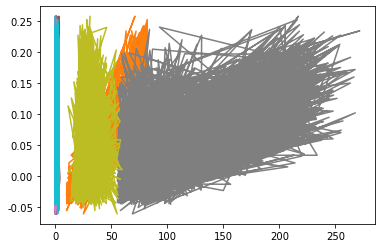

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#calculate the R square
print(lr.score(X_train, y_train))
# calculate y_hat
y_hat = lr.predict(X_train)
plt.plot(X_train, y_hat)
plt.show()